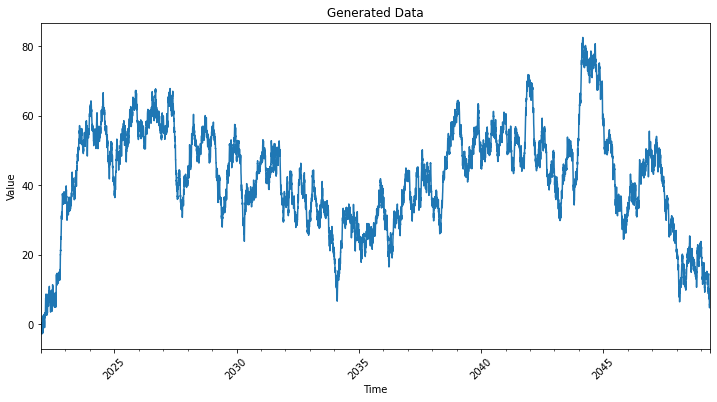

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Generate Data
np.random.seed(4)
n = 10000
epsilon = np.random.normal(loc=0, scale=1, size=n)
dates = pd.date_range(start='2022-01-01', periods=n, freq='D')

Y = pd.Series(np.cumsum(epsilon), name='Y')
Y.index = dates


# Plot the data
plt.figure(figsize=(12,6))
Y.plot()
plt.title('Generated Data')
plt.xlabel('Time')
plt.xticks(rotation = 45)
plt.ylabel('Value')
plt.show()

In [46]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    """
    Perform Dickey-Fuller test:
    Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
    Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
    """
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(Y)

Results of Dickey-Fuller Test:
Test Statistic                   -3.666703
p-value                           0.004607
#Lags Used                        0.000000
Number of Observations Used    9999.000000
Critical Value (1%)              -3.431004
Critical Value (5%)              -2.861829
Critical Value (10%)             -2.566924
dtype: float64


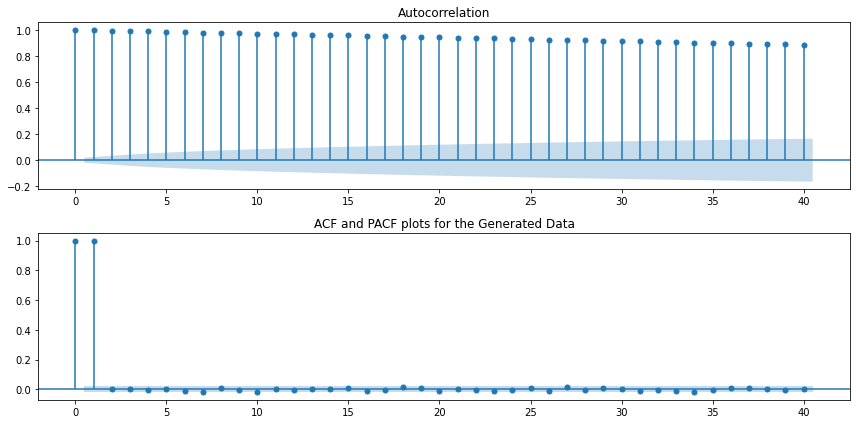

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,figsize=(12,6))
plot_acf(Y, ax=ax[0])  # Identifies the order of AR model
plot_pacf(Y, ax=ax[1])  # Identifies the order of MA model
plt.title('ACF and PACF plots for the Generated Data')
plt.tight_layout()
plt.show()

In [48]:
from statsmodels.tsa.arima_model import ARMA

# Fitting the model 
model = ARMA(Y, order=(0,2))  # (0,2) because we are fitting an MA model of order 2
model_fit = model.fit(disp=False)

# Make prediction
Y_pred = model_fit.predict(len(Y), len(Y))

print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      Y   No. Observations:                10000
Model:                     ARMA(0, 2)   Log Likelihood              -29753.521
Method:                       css-mle   S.D. of innovations              4.741
Date:                Mon, 18 Mar 2024   AIC                          59515.041
Time:                        17:49:24   BIC                          59543.883
Sample:                             0   HQIC                         59524.804
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.3168      0.163    260.091      0.000      41.998      42.636
ma.L1.Y        1.5868      0.007    239.785      0.000       1.574       1.600
ma.L2.Y        0.8454      0.004    197.302      0.0